## DATA 601 - Fall 2022
### Homework Assignment 5
Total points : (30 + 10)<br>
 Please provide your solutions into the cells provided after question cells. You can create new cells as needed. <br>

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

<b>Question 1</b> [<span style="color: red;">10 points</span>]:<br>
Consider the following line $y = x +1$ for a line segment s.t $x\in [1,2]$

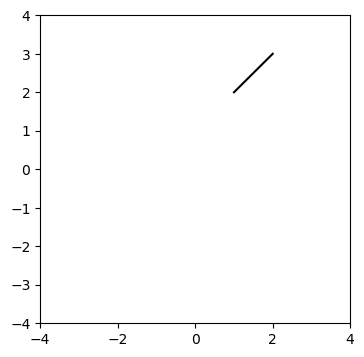

In [2]:
xy_orig = np.zeros([2,100]) # x is 0th row, y is 1st row 
xy_orig[0] = np.linspace(1,2,100)
xy_orig[1] = (xy_orig[0] + 1)

fig, ax = plt.subplots()
ax.plot(xy_orig[0],xy_orig[1],color='black')

ax.set_xlim(-4,4)
ax.set_ylim(-4,4)

fig.set_size_inches(4, 4)
plt.show()

Now with the $A$ defined below, Do the following:
- Use the matrix $A$ to transfrom the line segment in <code>xy_orig</code> and plot a plot (use the same settings for <code>matplotlib</code> as above).
- Then, Calculate the Singular Value Decomposition (svd) $A=U\Sigma V^H$
- Use the matrices from SVD to plot a step-by-step transformation starting from <code>xy_orig</code>, plot after each transformation (Hint : apply $V^H$ first, then $\Sigma$ and so forth)
- Compare the final transformation from applying SVD to the transformation using $A$
(Hint : use <code>SVD_example.ipynb</code> for guidance.

In [3]:
A = np.array([[ 0.8660254, -1.5],[ 2.5, -0.8660254]])
xy = np.zeros([2,100])

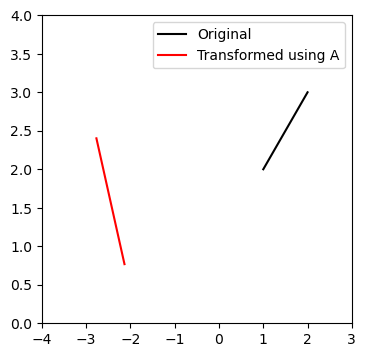

In [4]:
# transforming xy_orig using A matrix
xy_A = A @ xy_orig
# we now plot the orginal and transformed using A
fig, ax = plt.subplots()
ax.plot(xy_orig[0], xy_orig[1], color='black', label='Original')
ax.plot(xy_A[0], xy_A[1], color='r', label='Transformed using A')
ax.set_xlim(-4, 3)
ax.set_ylim(0, 4)
ax.legend()
fig.set_size_inches(4, 4)
plt.show()

In [5]:
# calculating SVD of matrix A
U, S, VH = np.linalg.svd(A)

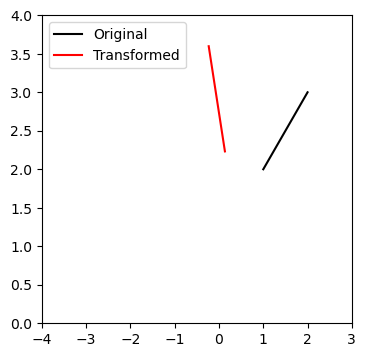

In [6]:
#Using the matrices from SVD to plot a step-by-step transformation starting from xy_orig
#Apply VH
xy_VH = VH @ xy_orig

# Plot original and transformed line segments
fig, ax = plt.subplots()
ax.plot(xy_orig[0], xy_orig[1], color='black', label='Original')
ax.plot(xy_VH[0], xy_VH[1], color='r', label='Transformed')
ax.set_xlim(-4, 3)
ax.set_ylim(0, 4)
ax.legend()
fig.set_size_inches(4, 4)
plt.show()

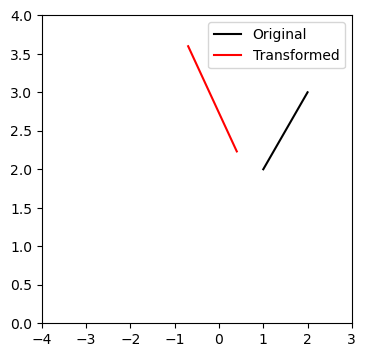

In [7]:
#Apply Sigma
xy_S = S.reshape(2,1) * (VH @ xy_orig)

# Plot original and transformed line segments
fig, ax = plt.subplots()
ax.plot(xy_orig[0], xy_orig[1], color='black', label='Original')
ax.plot(xy_S[0], xy_S[1], color='r', label='Transformed')
ax.set_xlim(-4, 3)
ax.set_ylim(0, 4)
ax.legend()
fig.set_size_inches(4, 4)
plt.show()


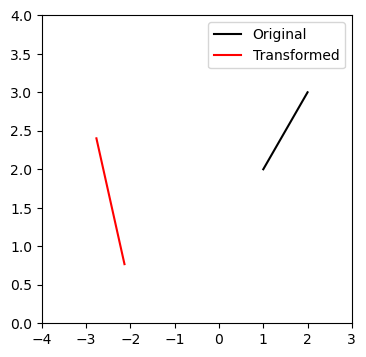

In [8]:
#Apply U
xy_U = U @ xy_S

# Plot original and transformed line segments
fig, ax = plt.subplots()
ax.plot(xy_orig[0], xy_orig[1], color='black', label='Original')
ax.plot(xy_U[0], xy_U[1], color='r', label='Transformed')
ax.set_xlim(-4, 3)
ax.set_ylim(0, 4)
ax.legend()
fig.set_size_inches(4, 4)
plt.show()

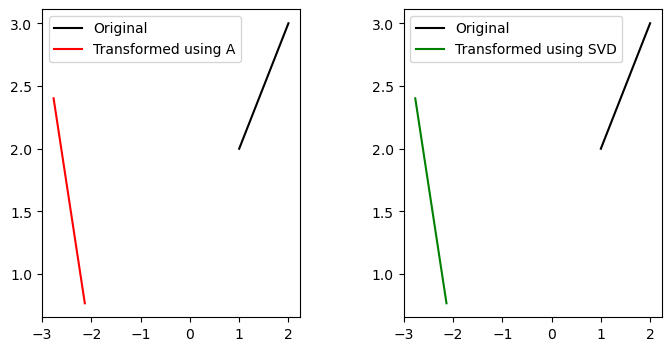

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

# Plot first subplot
xy_final = A @ xy_orig
axs[0].plot(xy_orig[0], xy_orig[1], color='black', label='Original')
axs[0].plot(xy_final[0], xy_final[1], color='r', label='Transformed using A')
ax.set_xlim(-4, 3)
ax.set_ylim(0, 4)
axs[0].legend()

# Plot second subplot
axs[1].plot(xy_orig[0], xy_orig[1], color='black', label='Original')
axs[1].plot(xy_U[0], xy_U[1], color='g', label='Transformed using SVD')
ax.set_xlim(-4, 3)
ax.set_ylim(0, 4)
axs[1].legend()

# Adjust spacing between subplots
fig.subplots_adjust(wspace=0.4)

plt.show()


We see that the  after applying A is same as the last plot (plot after applying U)


A real symmetric matrix that has the following special property:

$A = Q \Lambda Q^{T}$
also,

$A^{-1} = Q \Lambda^{-1} Q^{T} $<br>
Where $Q$ is the matrix of eigenvectors (column vectors) of $A$ and $\Lambda$ is the diagonal matrix of corresponding eigenvalues.

<b>Question 2</b> [<span style="color: red;">10 points</span>]: You need to load <code>symmetric_A.npy</code> as matrix $A$.You will also need to load <code>b.npy</code> as $b$. You need to solve for $x$ such that $Ax = b$ <b>without</b> using either <code>np.linalg.inv</code> or <code>np.linalg.solve</code> anywhere in your solution.

(Hint : the inverse of a diagonal matrix is a diagonal matrix with entries that are the reciprocal of the original values (1/val).

Finally calculate the absolute error $\|Ax - b\|_2$ and relative error $\frac{\|Ax - b\|_2}{\|b\|_2}$. The absolute value should be less than $<10^{-9}$ at least.

In [10]:
#Your answer goes below
#laoding the matrix
A = np.load("symmetric_A.npy")
A

array([[ 2, 10, 11, 12,  6,  8,  9,  6],
       [10,  8, 19, 20, 15,  1,  6,  5],
       [11, 19, 11, 14,  8,  8,  5, 10],
       [12, 20, 14,  4,  4, 13,  4,  4],
       [ 6, 15,  8,  4,  6, 20,  6, 10],
       [ 8,  1,  8, 13, 20, 18,  9, 18],
       [ 9,  6,  5,  4,  6,  9,  3,  1],
       [ 6,  5, 10,  4, 10, 18,  1, 19]], dtype=int32)

In [11]:
b = np.load("b.npy")
b

array([34.98731848, 58.44635928, 55.00010458, 47.13213679, 37.78258206,
       48.27043735, 27.17326274, 35.338795  ])

In [12]:
#A inverse matrix of a symmetric matrix
A_inv =  np.diag(np.diag(1/A))
A_inv

array([[0.5       , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.125     , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.09090909, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.25      , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.16666667,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05555556, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.05263158]])

In [13]:
# x = A inverse * b
x = A_inv @ b
x

array([17.49365924,  7.30579491,  5.00000951, 11.7830342 ,  6.29709701,
        2.68169096,  9.05775425,  1.85993658])

In [14]:
# absolute error 
abs_ = (A@x) - b
abs_err = np.linalg.norm(abs_, ord = 2)
print("absolute error: ", abs_err)

absolute error:  1437.1895538965662


In [15]:
#Relative error
rel_err = abs_err/np.linalg.norm(b, ord = 2)
print("Relative error: ", rel_err)

Relative error:  11.495193915878469


<b>Question 3</b> [<span style="color: red;">10 points</span>]: Calculate the Gradient $\nabla f(x,y,z)$ for the following function
$f(x,y,z) = x^3y^2z + x^2yz^2 + xy^3z$.
After which subsitute $x=2, y=3$ and $z=4$ in the Gradient.

In [16]:
#Your answer goes below
from sympy import diff, sin, exp
from sympy.abc import x,y,z

expr = x**3*y**2*z + x**2*y*z**2 + x*y**3*z
print("Given function f(x,y,z) =", expr)
#We use diff function to do partial differntaition with respect to the variables
gradient = (diff(expr,x), diff(expr,y), diff(expr,z))
print("Gradient of f:", gradient)

Given function f(x,y,z) = x**3*y**2*z + x**2*y*z**2 + x*y**3*z
Gradient of f: (3*x**2*y**2*z + 2*x*y*z**2 + y**3*z, 2*x**3*y*z + x**2*z**2 + 3*x*y**2*z, x**3*y**2 + 2*x**2*y*z + x*y**3)


In [17]:
# Evaluate gradient of f at (2, 3, 4)
value = [i.subs([(x, 2), (y, 3), (z, 4)]) for i in gradient]
print("Substituting x=2, y=3, and z=4 in gradient of f:",value)


Substituting x=2, y=3, and z=4 in gradient of f: [732, 472, 222]


BONUS QUESTION : <b>Question 3(a)</b>[<span style="color: red;">10 points</span>]: Calculate the Hessian matrix for the function $f(x,y,z)$ in Q3 and substitute with $x=2, y=3$ and $z=4$ 

In [18]:
#Your answer goes below

from sympy import hessian

# Define the function f(x, y, z)
expr = x**3*y**2*z + x**2*y*z**2 + x*y**3*z

# Calculate the Hessian matrix
hess = hessian(expr, [x, y, z])

# Print the Hessian matrix
print("Hessian matrix:")
print(hess)


Hessian matrix:
Matrix([[6*x*y**2*z + 2*y*z**2, 6*x**2*y*z + 2*x*z**2 + 3*y**2*z, 3*x**2*y**2 + 4*x*y*z + y**3], [6*x**2*y*z + 2*x*z**2 + 3*y**2*z, 2*x**3*z + 6*x*y*z, 2*x**3*y + 2*x**2*z + 3*x*y**2], [3*x**2*y**2 + 4*x*y*z + y**3, 2*x**3*y + 2*x**2*z + 3*x*y**2, 2*x**2*y]])


In [19]:
h = hess.subs([(x, 2), (y, 3), (z, 4)])
h

Matrix([
[528, 460, 231],
[460, 208, 134],
[231, 134,  24]])

~Chathurya